In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

plt.style.use('fivethirtyeight')
%matplotlib inline

In [102]:
import yfinance as yf
import datetime as dt
stock = "TSLA"
start=dt.datetime(2015,6,1)
end = dt.datetime(2025,6,1)
df=yf.download(stock,start,end)

/tmp/ipython-input-102-3335301462.py:6: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed


In [103]:
las = df.iloc[-755]
df.columns

MultiIndex([( 'Close', 'TSLA'),
            (  'High', 'TSLA'),
            (   'Low', 'TSLA'),
            (  'Open', 'TSLA'),
            ('Volume', 'TSLA')],
           names=['Price', 'Ticker'])

In [104]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2015-06-01,16.629999,16.773333,16.497999,16.760668,37576500
2015-06-02,16.556667,16.626667,16.420000,16.594667,32022000
2015-06-03,16.599333,16.714666,16.467333,16.546667,26722500
2015-06-04,16.394667,16.620001,16.380667,16.500000,36804000
2015-06-05,16.609333,16.646667,16.378668,16.400000,45330000


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2015-06-01 to 2025-05-30
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, TSLA)   2516 non-null   float64
 1   (High, TSLA)    2516 non-null   float64
 2   (Low, TSLA)     2516 non-null   float64
 3   (Open, TSLA)    2516 non-null   float64
 4   (Volume, TSLA)  2516 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 117.9 KB


In [106]:
df.isnull().sum()

,,0
Price,Ticker,
Close,TSLA,0
High,TSLA,0
Low,TSLA,0
Open,TSLA,0
Volume,TSLA,0


In [107]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
count,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03
mean,127.902955,130.806878,124.859008,127.930087,1.136426e+08
std,119.386945,122.226457,116.472966,119.491372,7.371426e+07
min,9.578000,10.331333,9.403333,9.488000,1.062000e+07
25%,18.516666,18.776333,18.259167,18.516166,6.831780e+07
50%,58.953999,59.898001,57.279333,59.035999,9.498015e+07
75%,233.067501,238.187500,226.889172,233.147499,1.318541e+08
max,479.859985,488.540009,457.510010,475.899994,9.140820e+08


In [108]:
df = df.reset_index()
df


Price,Date,Close,High,Low,Open,Volume
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA
0,2015-06-01,16.629999,16.773333,16.497999,16.760668,37576500
1,2015-06-02,16.556667,16.626667,16.420000,16.594667,32022000
2,2015-06-03,16.599333,16.714666,16.467333,16.546667,26722500
3,2015-06-04,16.394667,16.620001,16.380667,16.500000,36804000
4,2015-06-05,16.609333,16.646667,16.378668,16.400000,45330000
...,...,...,...,...,...,...
2511,2025-05-23,339.339996,343.179993,333.209991,337.920013,84654800
2512,2025-05-27,362.890015,363.790009,347.320007,347.350006,120146400
2513,2025-05-28,356.899994,365.000000,355.910004,364.839996,91404300


In [109]:
df.head()
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.to_csv('TSLA.csv')
df.iloc[-755]

,,2022-05-26
Price,Ticker,
Close,TSLA,2.359100e+02
High,TSLA,2.395567e+02
Low,TSLA,2.178867e+02
Open,TSLA,2.204733e+02
Volume,TSLA,1.060032e+08


In [10]:
TSLA_data= pd.read_csv('TSLA.csv')
TSLA_data.columns

Index(['Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [11]:
# Candlesticks
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(
                                     open = TSLA_data['Open'],
                                     high = TSLA_data['High'],
                                     low = TSLA_data['Low'],
                                     close = TSLA_data['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

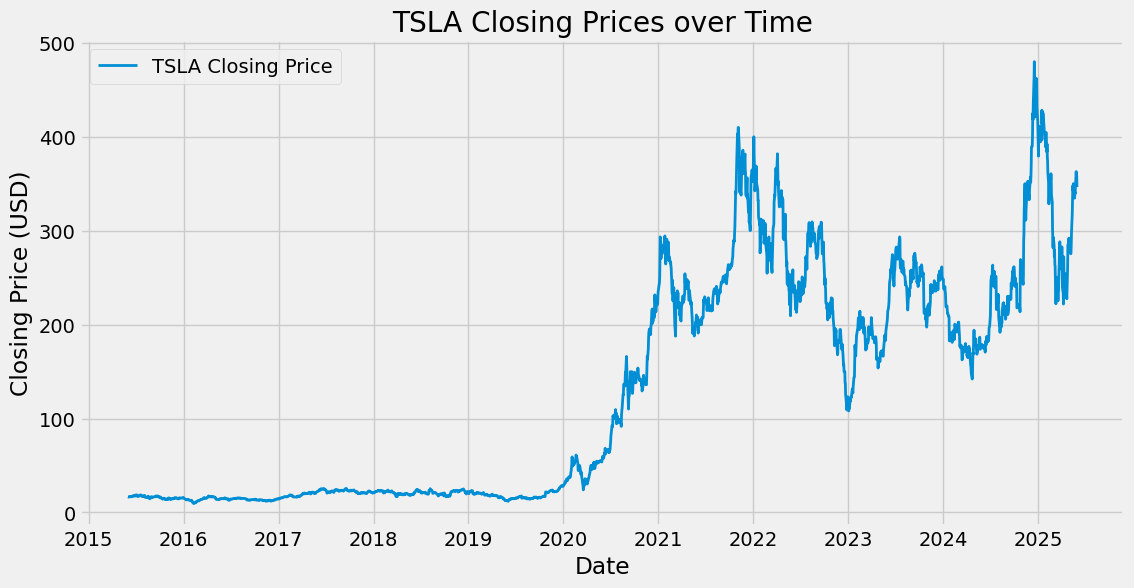

In [12]:
# Closing Prices
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label = f'{stock} Closing Price', linewidth = 2)
plt.title(f'{stock} Closing Prices over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()

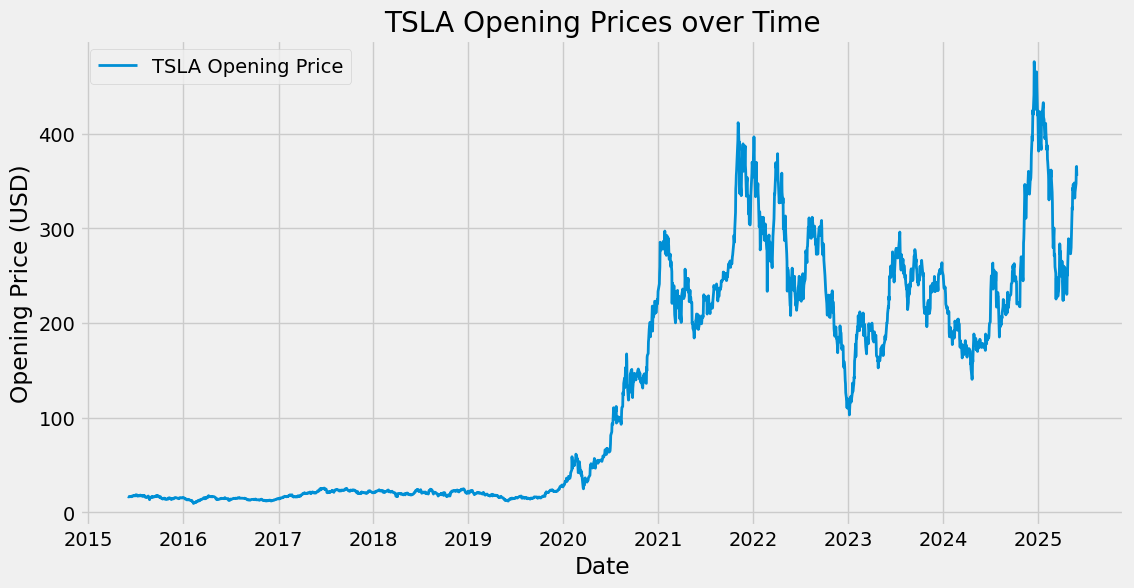

In [13]:
# Opening Prices
plt.figure(figsize=(12,6))
plt.plot(df['Open'], label = f'{stock} Opening Price', linewidth = 2)
plt.title(f'{stock} Opening Prices over Time')
plt.xlabel('Date')
plt.ylabel('Opening Price (USD)')
plt.legend()
plt.show()

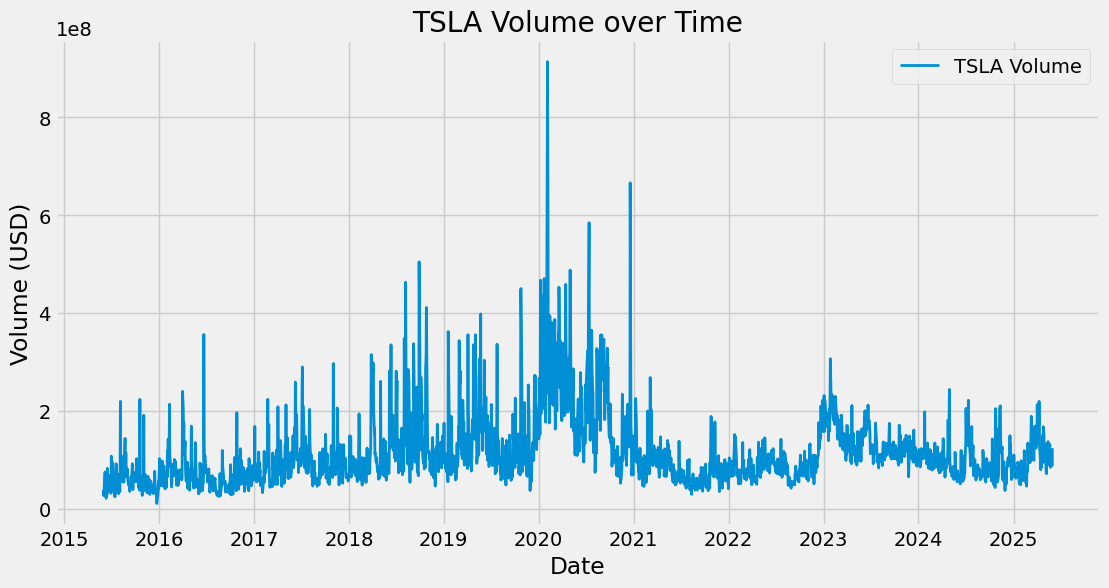

In [14]:
# Volume Prices
plt.figure(figsize=(12,6))
plt.plot(df['Volume'], label = f'{stock} Volume', linewidth = 2)
plt.title(f'{stock} Volume over Time')
plt.xlabel('Date')
plt.ylabel('Volume (USD)')
plt.legend()
plt.show()

In [15]:
# Moving Average
df_TSLA = pd.DataFrame(df['Close'])
#df_TSLA.rolling(4).mean()
df_TSLA_1Year=df_TSLA.rolling(365).mean()
df_TSLA_2Year=df_TSLA.rolling(730).mean()

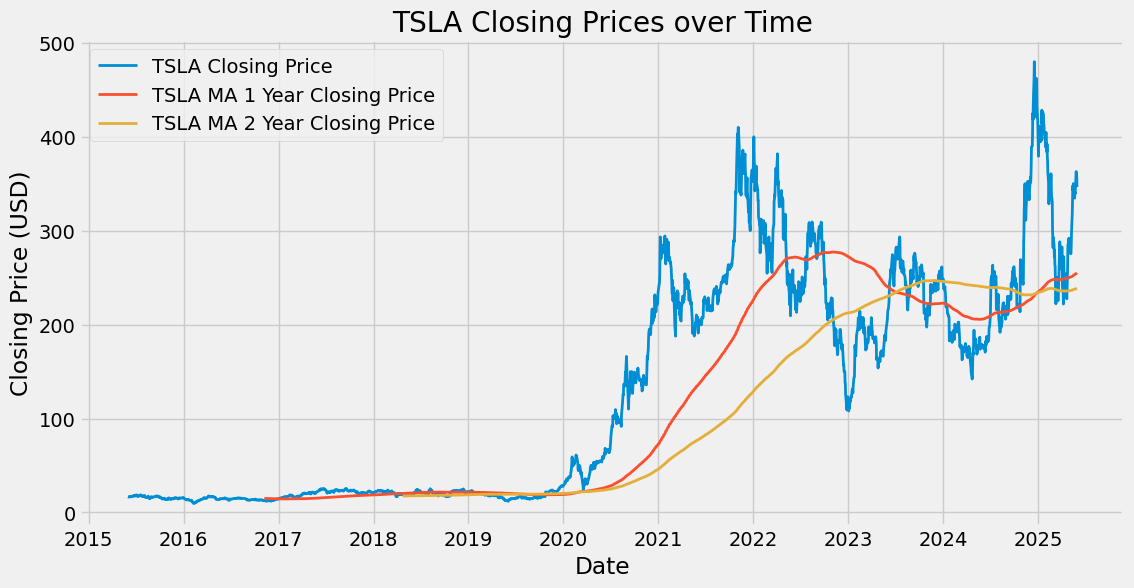

In [16]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label = f'{stock} Closing Price', linewidth = 2)
plt.plot(df_TSLA_1Year['TSLA'], label = f'{stock} MA 1 Year Closing Price', linewidth = 2)
plt.plot(df_TSLA_2Year['TSLA'], label = f'{stock} MA 2 Year Closing Price', linewidth = 2)
plt.title(f'{stock} Closing Prices over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()

In [17]:
df_TSLA_1Year_exp =df['Close'].ewm(span=365,adjust=False).mean()

In [18]:
df_TSLA_2Year_exp =df['Close'].ewm(span=730,adjust=False).mean()

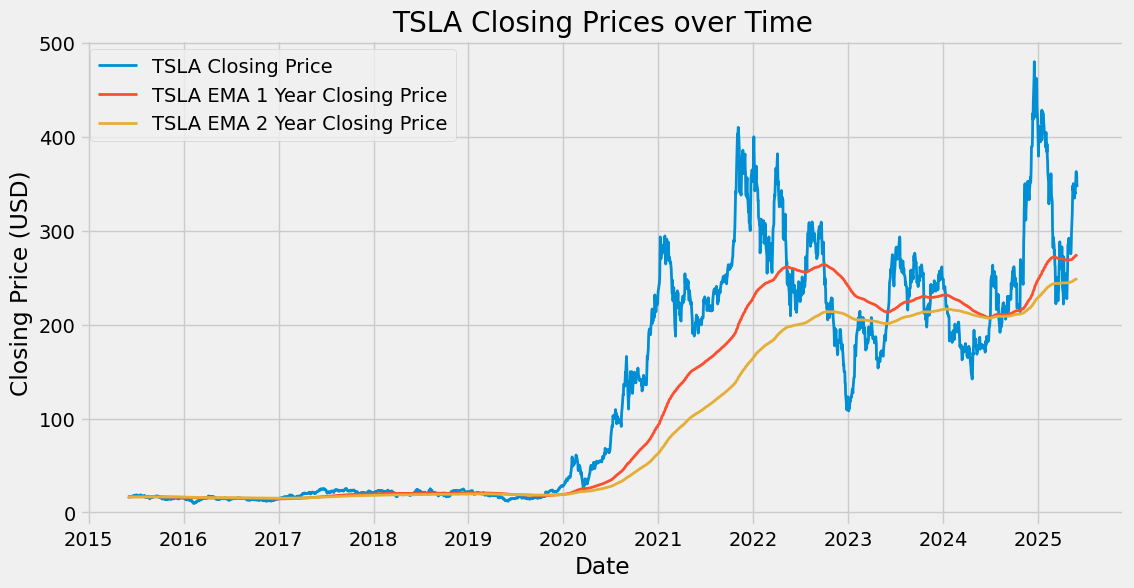

In [19]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label = f'{stock} Closing Price', linewidth = 2)
plt.plot(df_TSLA_1Year_exp['TSLA'], label = f'{stock} EMA 1 Year Closing Price', linewidth = 2)
plt.plot(df_TSLA_2Year_exp['TSLA'], label = f'{stock} EMA 2 Year Closing Price', linewidth = 2)
plt.title(f'{stock} Closing Prices over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()

Predicting next 30 days Stocks

In [20]:
# LSTM(Long Short Term Memory)
#Training & Testing
training_data, testing_data = pd.DataFrame(df['Close'][0:int(len(df)*0.7)]), pd.DataFrame(df['Close'][int(len(df)*0.7):int(len(df))])
training_data.shape

(1761, 1)

###### Scalling

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

In [22]:
data_training_array = scaler.fit_transform(training_data)

In [23]:
data_training_array.shape[0]

1761

In [24]:
x_train = []
y_train = []

for i in range(365,data_training_array.shape[0]):
    x_train.append(data_training_array[i-365:i])
    y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [25]:
x_train.shape

(1396, 365, 1)

Model Building

In [26]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

LSTM layer with 50 units (neurons)

activation='relu': Applies ReLU activation (though usually LSTM uses tanh; using relu is uncommon but allowed).

return_sequences=True: This makes the layer return the full sequence of outputs (not just the last one). This is required when stacking LSTMs.

input_shape=(x_train.shape[1], 1): The input shape here is (timesteps, features). If x_train.shape[1] = 60, it means each input sequence has 60 time steps and 1 feature per step.

Dropout randomly disables 20% / 30% / 40% / 50% of neurons during training to prevent overfitting.

In [27]:
model = Sequential()
model.add(LSTM(units = 50, activation= 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60,activation= 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80,activation= 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120,activation= 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 365, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 365, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 365, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 365, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 365, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 365, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 45s 894ms/step - loss: 0.0603
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 38s 874ms/step - loss: 0.0092
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 39s 872ms/step - loss: 0.0073
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 41s 889ms/step - loss: 0.0063
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 41s 884ms/step - loss: 0.0073
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 41s 880ms/step - loss: 0.0053
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 41s 868ms/step - loss: 0.0058
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 41s 872ms/step - loss: 0.0056
Epoch 9/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 41s 874ms/step - loss: 0.0053
Epoch 10/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 41s 875ms/step - loss: 0.0044
Epoch 11/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 38s 873ms/step - loss: 0.0050
Epoch 12/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 41s 870ms/step - loss: 0.0053
Epoch 13/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 41s 874ms/step - loss: 0.0042
Epoch 14/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 41s 873ms/step - loss: 0.0040
Epoch 15/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 41s 

In [58]:
past_365_days = data_training_array[len(data_training_array)-365:]
past_365_days = pd.DataFrame(past_365_days)
past_365_days = past_365_days.rename(columns={0:'TSLA'})
past_365_days

,TSLA
0,0.508748
1,0.503270
2,0.494545
3,0.522127
4,0.554678
...,...
360,0.566683
361,0.528787
362,0.537944
363,0.499033


In [59]:
final_df = pd.concat([past_365_days,testing_data],ignore_index=True)

In [60]:
final_df.head()

,TSLA
0,0.508748
1,0.503270
2,0.494545
3,0.522127
4,0.554678


In [61]:
input_data= scaler.transform(final_df)

In [62]:
x_test = []
y_test = []

for i in range(365,input_data.shape[0]):
    x_test.append(input_data[i-365:i])
    y_test.append(input_data[i,0])

x_test, y_test = np.array(x_test), np.array(y_test)

In [63]:
x_test.shape

(755, 365, 1)

In [64]:
y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 382ms/step


In [65]:
y_predicted.shape

(755, 1)

In [66]:
scaler.scale_

array([0.00249755])

In [73]:
y_predicted = y_predicted*(1/0.00249755)
y_test = y_test*(1/0.00249755)

In [111]:
y_predicted=pd.DataFrame(y_predicted)
y_predicted['Date']= pd.date_range(start='2023-04-12', periods=len(y_predicted), freq='D')
y_predicted.set_index('Date', inplace=True)
y_test=pd.DataFrame(y_test)
y_test['Date']= pd.date_range(start='2023-04-12', periods=len(y_test), freq='D')
y_test.set_index('Date', inplace=True)

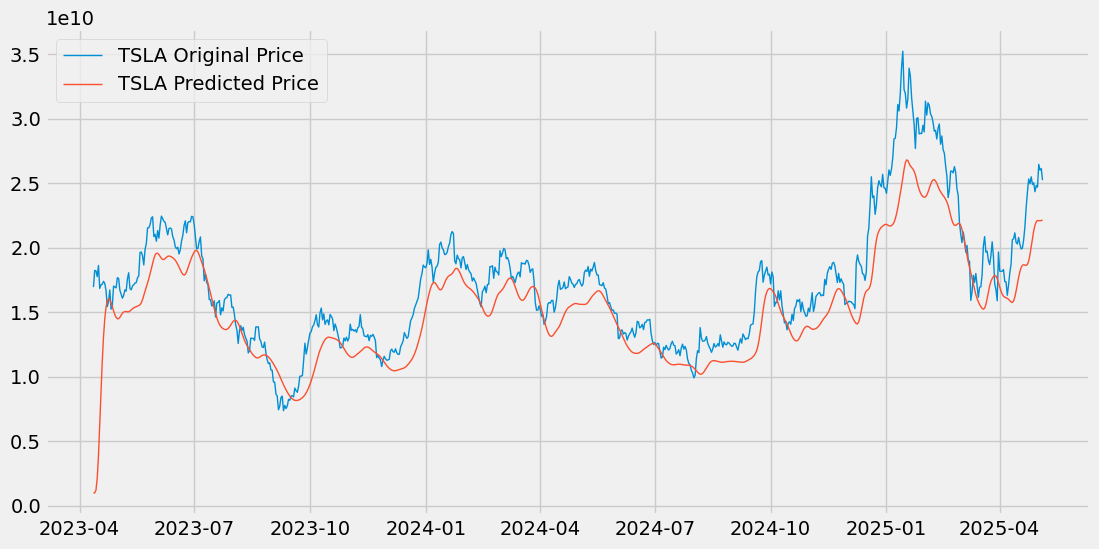

In [113]:
plt.figure(figsize=(12,6))
plt.plot(y_test, label = f'{stock} Original Price', linewidth = 1)
plt.plot(y_predicted, label = f'{stock} Predicted Price', linewidth = 1)
plt.legend()
plt.show()